In [1]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

# Intersection visualization

We can either plot the topology of an intersection or its geometric
representation. For the first, we will employ the `networkx` package and
`GeoPandas` for the latter. 

At first, let's load the road network of Braunschweig and pick the research intersection with id `300000`.

In [2]:
from xodr2nxgpd.network import RoadNetwork

intersection = RoadNetwork.from_file().intersection("300000")

## Topology
For the visualization of the road network topology, the `IntersectionNetwork` provides
the `plot()` method.

(-2.24125, 2.24125, -1.2100000000000002, 1.2100000000000002)

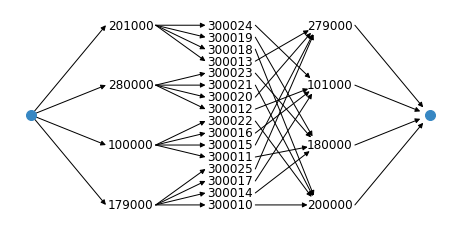

In [4]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1, figsize=(8, 4))
intersection.plot(dx=0.25, ax=ax)
plt.axis('off')

Since we use `networkx` we can change the size of the graph simply using `matplotlib`. We can create a figure manually and specify its dimension.

(-2.24125, 2.24125, -1.2100000000000002, 1.2100000000000002)

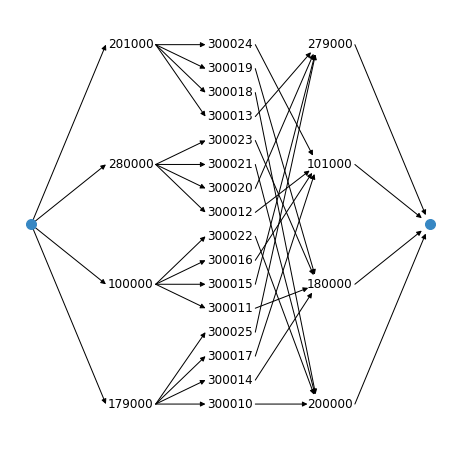

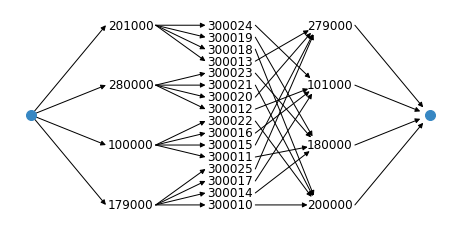

In [5]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1, figsize=(8, 8))
intersection.plot(dx=0.25)
plt.axis('off')

f, ax = plt.subplots(1, 1, figsize=(8, 4))
intersection.plot(dx=0.25)
plt.axis('off')


## Geometric representation
Besides the topology of the intersection, we can also visualize the real
representation of the intersection in terms of the OpenDRIVE reference lines.
For that purpose, we have to convert it to a `GeoPandas.GeoDataFrame` first.

In [6]:
geointersection = intersection.as_geopandas()
geointersection

,geometry,road_type,predecessor,successor
id,,,,
100000,"LINESTRING (181.104 65.127, 148.274 52.271, 13...",0,[SpecialNode.START],"[300011, 300015, 300016, 300022]"
101000,"LINESTRING (-23.568 -3.397, -36.668 -5.827, -5...",2,"[300012, 300016, 300017, 300024]",[SpecialNode.END]
179000,"LINESTRING (37.570 -91.304, 26.617 -60.317, 15...",0,[SpecialNode.START],"[300010, 300014, 300017, 300025]"
180000,"LINESTRING (-2.873 28.034, -13.786 58.361, -19...",2,"[300011, 300014, 300019, 300023]",[SpecialNode.END]
200000,"LINESTRING (37.821 3.273, 62.429 12.204, 114.8...",2,"[300010, 300018, 300021, 300022]",[SpecialNode.END]
201000,"LINESTRING (-89.578 -14.856, -83.477 -14.607, ...",0,[SpecialNode.START],"[300013, 300018, 300019, 300024]"
279000,"LINESTRING (13.276 -26.875, 36.178 -91.763)",2,"[300013, 300015, 300020, 300025]",[SpecialNode.END]
280000,"LINESTRING (-45.936 195.014, -45.676 184.914, ...",0,[SpecialNode.START],"[300012, 300020, 300021, 300023]"
300010,"LINESTRING (24.005 -23.284, 23.181 -20.298, 22...",1,[179000],[200000]


Each reference line is now represented by a `shapely.LineString`,
i.e., a series of `shapely.Point` objects. Thus, we can simply call `plot()`
to visualize the intersection colorizing the roads according to the road type.

<AxesSubplot:>

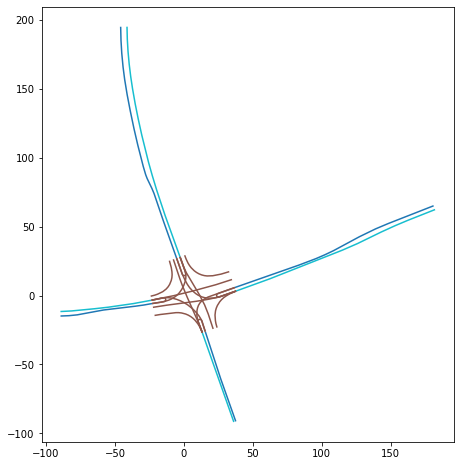

In [7]:
geointersection.plot(figsize=(8, 8), column='road_type', cmap='tab10')

Note that the incoming and outgoing roads are also part of the intersection.